<div>20221009 GKS Kim Eunhong</div>
<h1><b>Multinomial Naive Bayes Text Classification Model</b></h1>
<h3>- Machine Learning Final Project -</h3>
<p>Overview : This text classification model is built using a probabilistic algorithm derived from Bayes' theorem. It involves obtaining the news data from scikit-learn, which consists of 20 categories, and then undergoing a training process. After training, the model is tested using a test dataset for actual classification. Subsequently, the accuracy is evaluated, and the model is assessed through the examination of a confusion matrix and a histogram.</p>
<span>Github Link : </span>
<a href="https://github.com/eunhong0925/gks-4008">https://github.com/eunhong0925/gks-4008</a>


<h5>1. Import Necessary Library</h5>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_20newsgroups

<h5>2. Fetch scikit-learn data</h5>

In [2]:
data = fetch_20newsgroups()
categories = data.target_names
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [3]:
#
print('\n'.join(data["DESCR"].split('\n')[:10]))

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.


In [4]:
#
print(f"Data category : {data.target_names}")

Data category : ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [5]:
# 
print(f"Sampels total(18846) : train data({len(train.data)}), test data({len(test.data)})")

Sampels total(18846) : train data(11314), test data(7532)


<h5>3. Make a voca list</h5>
* Use 'set' initially to prevent word duplication

In [6]:
vocab_set = set()
for dstr in train.data:
    words = dstr.lower().split()
    vocab_set.update(words)
new_vocab = list(vocab_set)

In [7]:
#
print(f"total words in the voca list : {len(new_vocab)}")

total words in the voca list : 253561


<h5>4. Create a two dictionary for storing</h5>
* Use log probability to ensure numerical stability

In [8]:
vocabcount_category = {category: {v: 0 for v in new_vocab} for category in categories}
vocab_logp_category = {category: {key: 0 for key in new_vocab} for category in categories}

<h5>5. Traing Process</h5>

In [9]:
# Iterate through each category
for category in categories:
    # P(category) - Collect data strings for the current category 
    data_category = [train.data[i] for i in range(len(train.data)) 
                     if train.target_names[train.target[i]] == category]

    # Initialize vocabulary counts for the current category
    vocabcount_category[category] = {v: 0 for v in new_vocab}
    
    # P(v|category) - Count occurrences of words in the current category 
    total_w = 0
    for dstr in data_category:
        words = set(dstr.lower().split())  # Convert to a set for faster membership tests
        for w in words: 
            total_w += 1
            vocabcount_category[category][w] += 1
    # Print the total words in the vocabulary for the current category for verification
    print(f"Total words in vocab for {category} = {total_w}")

    # Apply Laplace smoothing
    for k in vocabcount_category[category]:
        vocabcount_category[category][k] += 1

    # Convert counts to probabilities
    total = sum(vocabcount_category[category].values())  # Sum values from the dictionary
    for k in vocabcount_category[category]:
        vocabcount_category[category][k] /= total

    # Compute log-probabilities
    vocab_logp_category[category] = {key: np.log(value) for key, value in vocabcount_category[category].items()}


Total words in vocab for alt.atheism = 93469
Total words in vocab for comp.graphics = 80125
Total words in vocab for comp.os.ms-windows.misc = 89837
Total words in vocab for comp.sys.ibm.pc.hardware = 78362
Total words in vocab for comp.sys.mac.hardware = 72042
Total words in vocab for comp.windows.x = 95287
Total words in vocab for misc.forsale = 60799
Total words in vocab for rec.autos = 89875
Total words in vocab for rec.motorcycles = 86591
Total words in vocab for rec.sport.baseball = 88539
Total words in vocab for rec.sport.hockey = 106192
Total words in vocab for sci.crypt = 128449
Total words in vocab for sci.electronics = 81025
Total words in vocab for sci.med = 107759
Total words in vocab for sci.space = 109720
Total words in vocab for soc.religion.christian = 124548
Total words in vocab for talk.politics.guns = 117517
Total words in vocab for talk.politics.mideast = 142915
Total words in vocab for talk.politics.misc = 107829
Total words in vocab for talk.religion.misc = 76543

<h5>6. Predict Process

In [10]:
predicted_count = 0
total_samples = len(test.data)

predicted_labels = []
true_labels = []

for i in range(total_samples):
    # Extract test sample
    tsample = test.data[i]

    # P(Category | v) Compute log probabilities for each category
    logp_category = {category: sum(vocab_logp_category[category].get(w, 0) 
                                   for w in set(tsample.lower().split())) for category in categories}

    # Find the index of the category with the maximum log probability
    predicted_index = np.argmax(list(logp_category.values()))
    
    # Get the predicted label using the index
    predicted_label = categories[predicted_index]
    predicted_labels.append(predicted_label)

    # Append true label to true_labels list
    true_label = test.target_names[test.target[i]]
    true_labels.append(true_label)

    # Compare with the true label
    if predicted_label == true_label:
        predicted_count += 1

In [11]:
logp_category

{'alt.atheism': -1048.6662041159673,
 'comp.graphics': -1104.4225211630908,
 'comp.os.ms-windows.misc': -1108.7506959360112,
 'comp.sys.ibm.pc.hardware': -1096.9650112255451,
 'comp.sys.mac.hardware': -1097.5748827820232,
 'comp.windows.x': -1097.319788084408,
 'misc.forsale': -1136.9713527278152,
 'rec.autos': -1087.279643073539,
 'rec.motorcycles': -1091.0188938594663,
 'rec.sport.baseball': -1099.6381970424354,
 'rec.sport.hockey': -1099.2093151943666,
 'sci.crypt': -1074.042993227555,
 'sci.electronics': -1093.3438323548028,
 'sci.med': -1078.4846431394249,
 'sci.space': -1080.0645132967493,
 'soc.religion.christian': -1016.5521637746941,
 'talk.politics.guns': -1065.8031153799122,
 'talk.politics.mideast': -1067.8823739121176,
 'talk.politics.misc': -1064.7998934358893,
 'talk.religion.misc': -1073.4752531866284}

In [12]:
# Bring examples
for i in range(0,2):
    print('\n'.join(test.data[i].split('\n')[:7]))
    print("- - " * 20)
    print(f"True Category: {true_labels[i]}")
    print(f"Predicted Category: {predicted_labels[i]}")
    print("- - " * 20)


From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)
Subject: Need info on 88-89 Bonneville
Organization: University at Buffalo
Lines: 10
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
True Category: rec.autos
Predicted Category: rec.autos
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
From: Rick Miller <rick@ee.uwm.edu>
Subject: X-Face?
Organization: Just me.
Lines: 17
Distribution: world
NNTP-Posting-Host: 129.89.2.33
Summary: Go ahead... swamp me.  <EEP!>
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
True Category: comp.windows.x
Predicted Category: sci.crypt
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


<h5>7. Calculate Model accuracy

In [13]:
# Calculate and print accuracy
test_accuracy = predicted_count / total_samples
print("Test Accuracy(%):", test_accuracy * 100)

Test Accuracy(%): 76.28783855549655


<h5>8. Visualize through confusion matrix

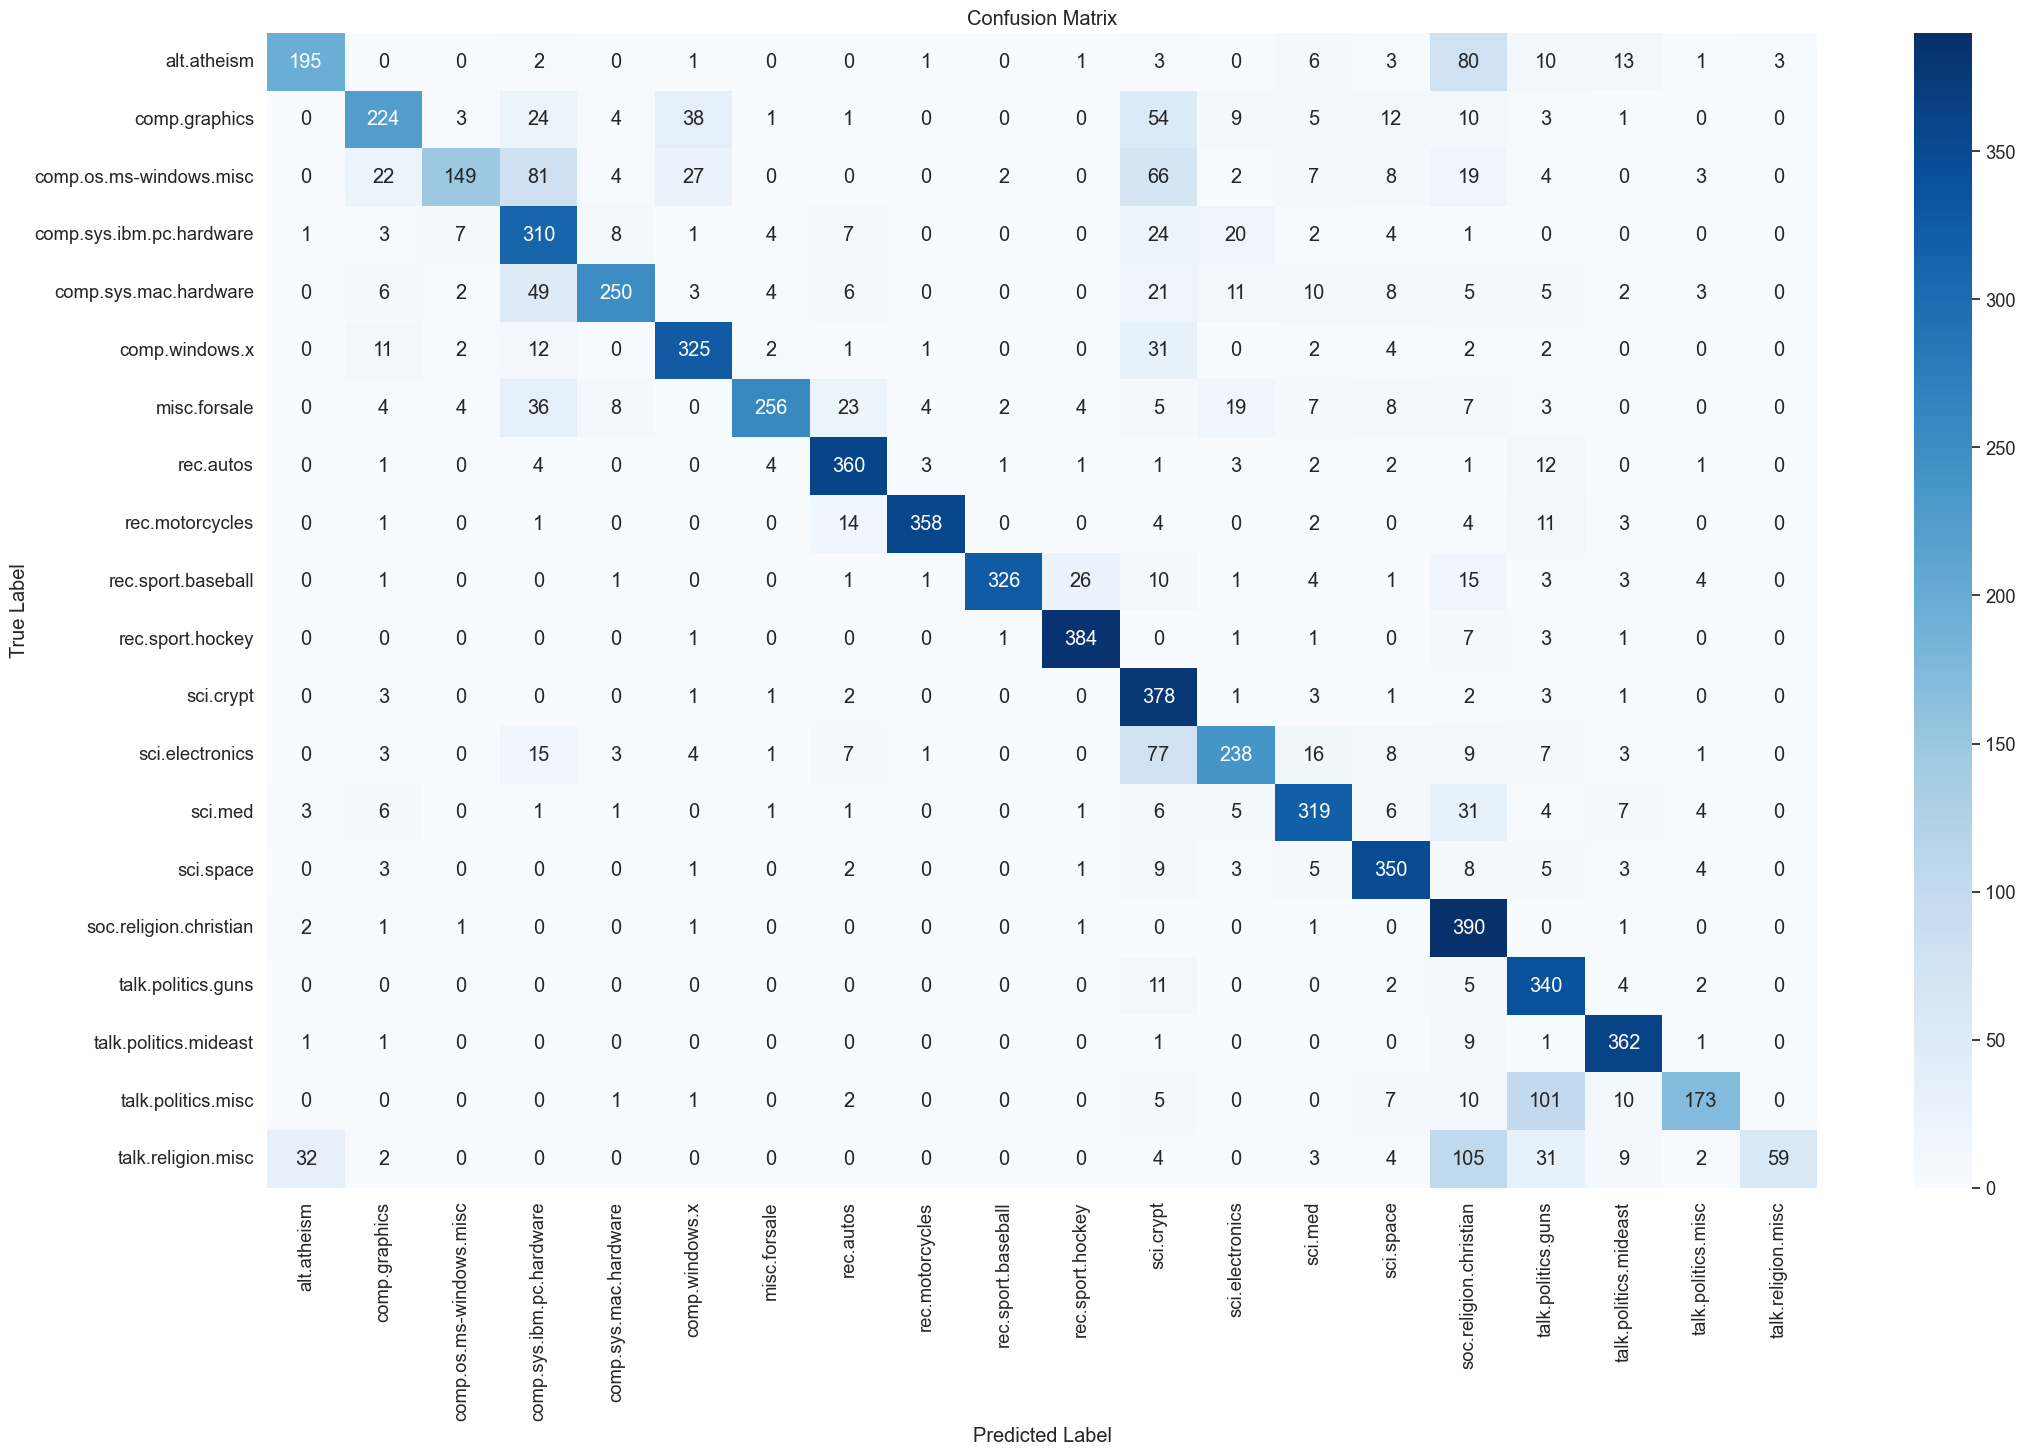

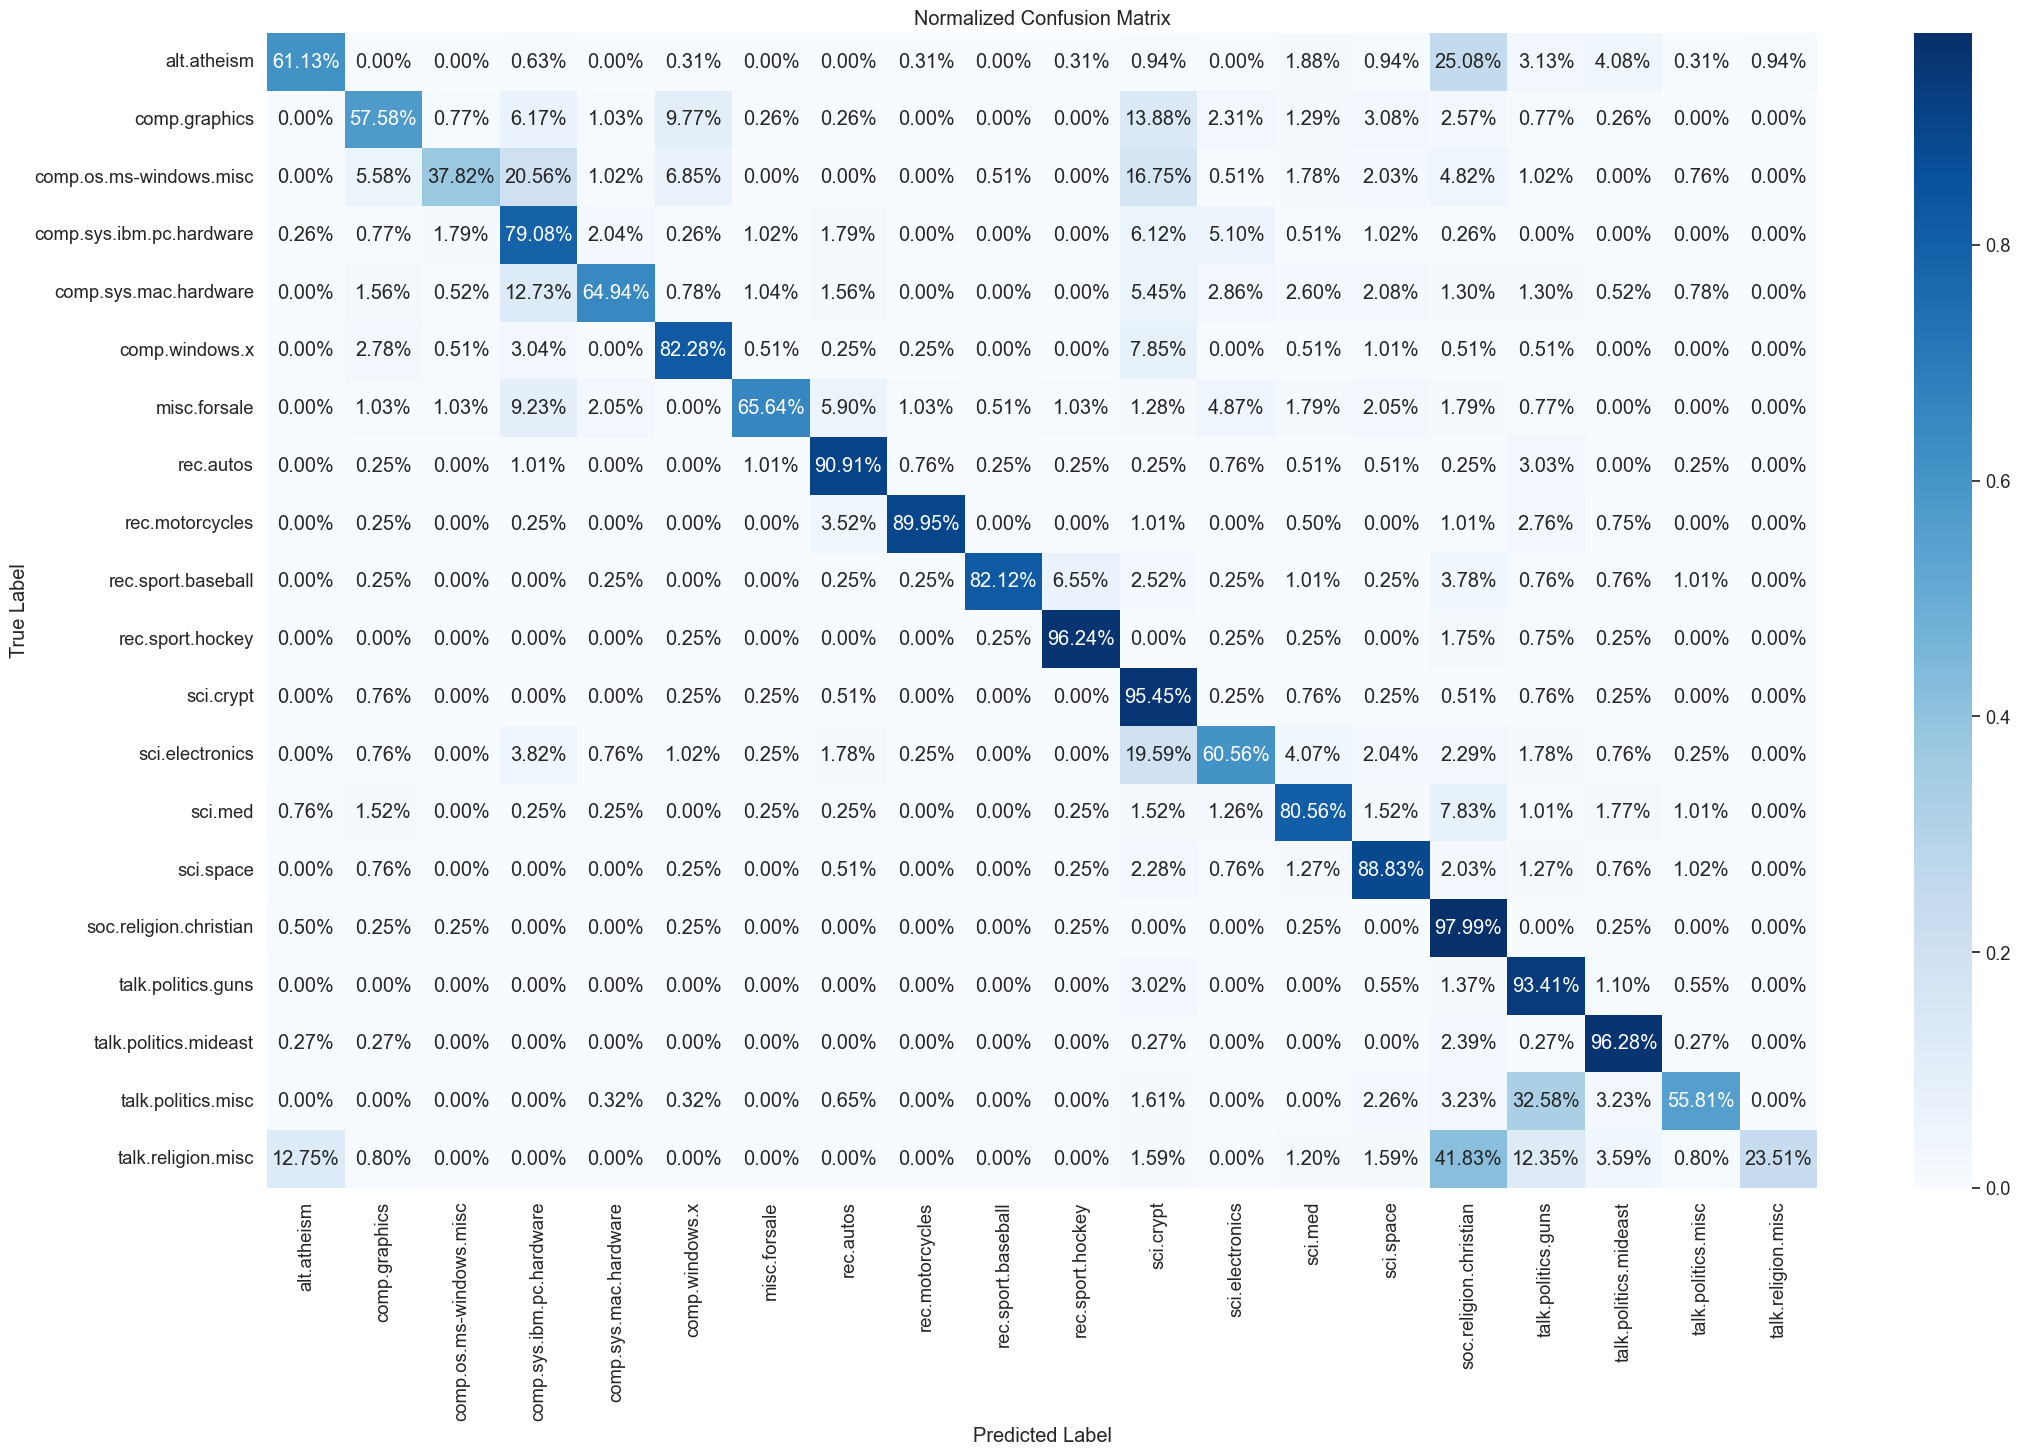

In [14]:
cm = confusion_matrix(true_labels, predicted_labels, labels=categories)
plt.figure(figsize=(25, 15))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(25, 15))
ax = sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap="Blues", xticklabels=categories, yticklabels=categories, cbar=True)

# ax.xaxis.set_tick_params(rotation=45, ha='right')
ax.yaxis.set_tick_params(rotation=0)

plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


<h5>8-2. Visualize through histogram

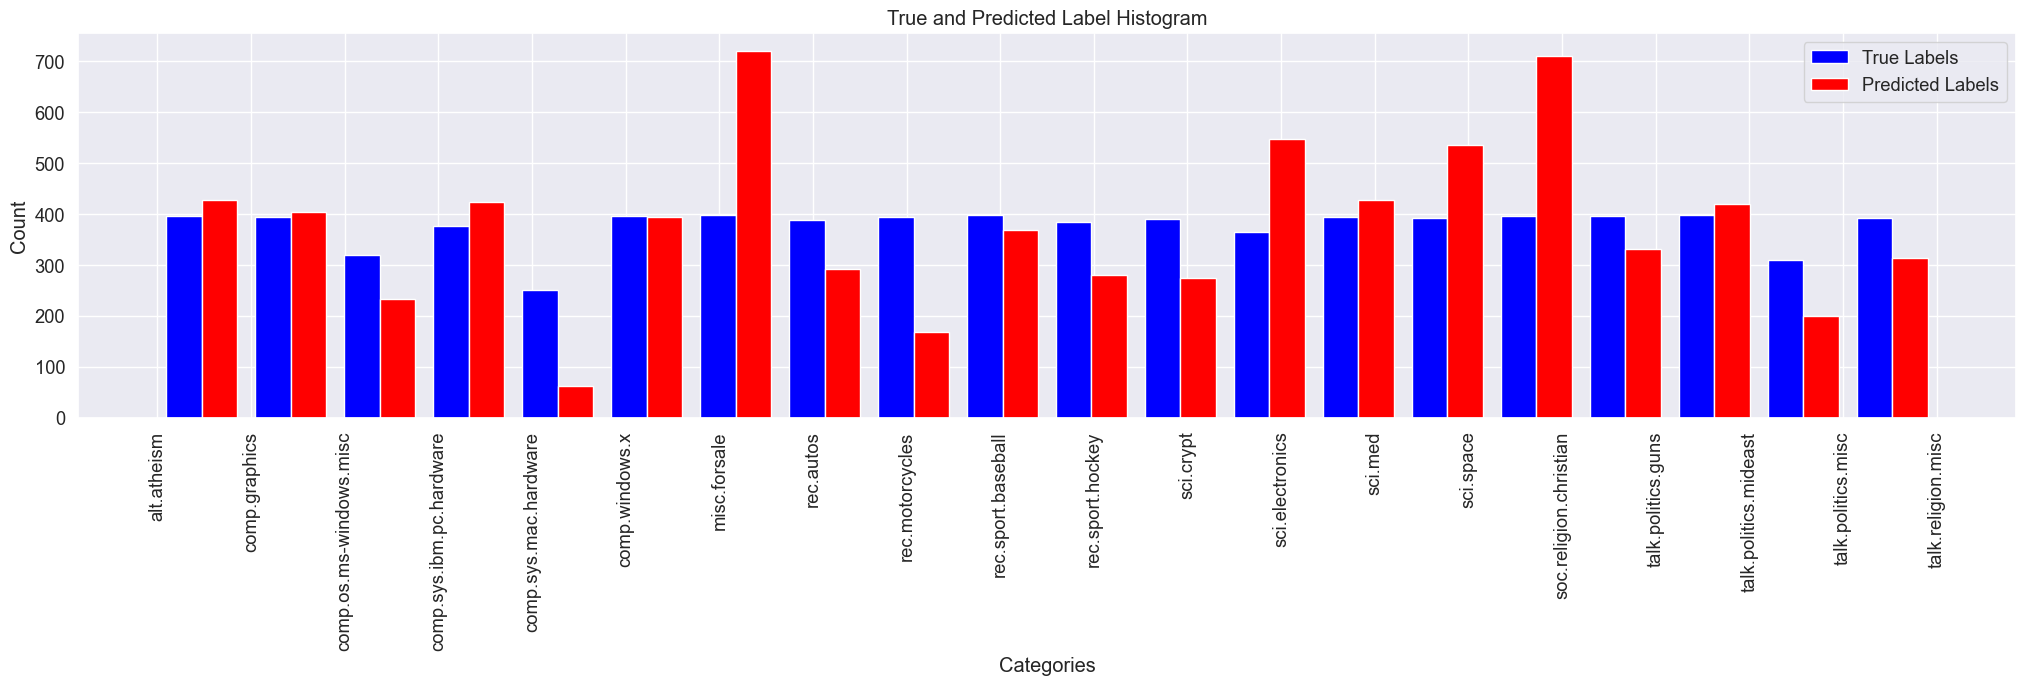

In [15]:
plt.figure(figsize=(25, 5))
plt.hist([true_labels, predicted_labels], bins=len(categories), color=['blue', 'red'], 
         label=['True Labels', 'Predicted Labels'])
plt.title("True and Predicted Label Histogram")
plt.xlabel("Categories")
plt.xticks(range(len(categories)), [label.replace(" ", "\n") for label in categories], rotation='vertical')
plt.ylabel("Count")
plt.legend()
plt.show()


<h3>Summary</h3>
<p>The model achieves an accuracy of approximately 76%. Analysis of two types of visualization graphs revealed an accuracy ranging from 50% to 90%, with the majority falling above 50%, excluding specific categories. Considering that the data consists of text written by humans, it's important to acknowledge the possibility of classification errors in the data itself, in addition to the model's performance. Despite this, the model demonstrates a significant level of accuracy and performance. For the next steps, exploring alternative methods of accuracy measurement or adopting different machine learning approaches for handling multinomial data could be considered.</p>

